In [13]:
#1. Import packages
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import sklearn.datasets as skdatasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [14]:
#2. Load the csv data
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [15]:
#3. Datasets summary and type
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [17]:
#Split into x and y
x= df.drop('target',axis=1)
y= df['target']

In [18]:
#Split the data
SEED = 888
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=SEED)

In [19]:
#Standardise the data
standardizer = StandardScaler()
standardizer.fit(x_train)
x_train= standardizer.transform(x_train)
x_test= standardizer.transform(x_test)

In [20]:
#create model

nClass = len(np.unique(np.array(y_test)))
model = keras.Sequential()

model.add(layers.InputLayer(input_shape=(x_train.shape[1],)))
model.add(layers.Dense(60, activation='relu'))
model.add(layers.Dense(30, activation='relu'))
model.add(layers.Dense(nClass, activation='softmax'))

In [21]:
#Show the structure of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 60)                840       
                                                                 
 dense_5 (Dense)             (None, 30)                1830      
                                                                 
 dense_6 (Dense)             (None, 2)                 62        
                                                                 
Total params: 2,732
Trainable params: 2,732
Non-trainable params: 0
_________________________________________________________________


In [22]:
#Compile model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [23]:
#Train model
BATCH_SIZE = 20
EPOCHS = 40
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=BATCH_SIZE,epochs=EPOCHS)

Epoch 1/40
36/36 [==============================] - 1s 9ms/step - loss: 0.5419 - accuracy: 0.7238 - val_loss: 0.4573 - val_accuracy: 0.7597
Epoch 2/40
36/36 [==============================] - 0s 3ms/step - loss: 0.3923 - accuracy: 0.8131 - val_loss: 0.3870 - val_accuracy: 0.8409
Epoch 3/40
36/36 [==============================] - 0s 3ms/step - loss: 0.3453 - accuracy: 0.8410 - val_loss: 0.3493 - val_accuracy: 0.8636
Epoch 4/40
36/36 [==============================] - 0s 4ms/step - loss: 0.3150 - accuracy: 0.8773 - val_loss: 0.3281 - val_accuracy: 0.8766
Epoch 5/40
36/36 [==============================] - 0s 4ms/step - loss: 0.2923 - accuracy: 0.8996 - val_loss: 0.3093 - val_accuracy: 0.8766
Epoch 6/40
36/36 [==============================] - 0s 4ms/step - loss: 0.2750 - accuracy: 0.9079 - val_loss: 0.2934 - val_accuracy: 0.8864
Epoch 7/40
36/36 [==============================] - 0s 4ms/step - loss: 0.2583 - accuracy: 0.9093 - val_loss: 0.2798 - val_accuracy: 0.8929
Epoch 8/40
36/36 [==

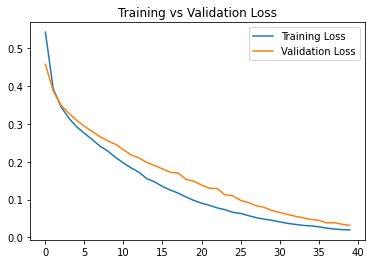

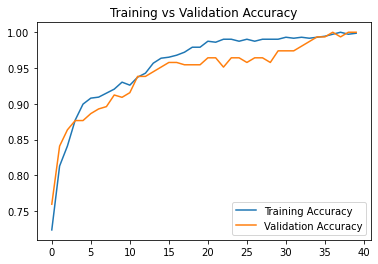

<Figure size 432x288 with 0 Axes>

In [24]:
#Visualization
import matplotlib.pyplot as plt

training_loss = history.history['loss']
val_loss = history.history['val_loss']
training_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs_x_axis = history.epoch

plt.plot(epochs_x_axis,training_loss,label='Training Loss')
plt.plot(epochs_x_axis,val_loss,label='Validation Loss')
plt.title("Training vs Validation Loss")
plt.legend()
plt.figure()

plt.plot(epochs_x_axis,training_acc,label='Training Accuracy')
plt.plot(epochs_x_axis,val_acc,label='Validation Accuracy')
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.figure()

plt.show()

In [25]:
#Evaluate the models accuracy
model_ev = pd.DataFrame({'Model': ['Model 1'], 'Training Accuracy %': [training_acc[-1]*100],'Validation Accuracy %': [val_acc[-1]*100], 'Training Loss %': [training_loss[-1]*100], 'Validation Loss%': [val_loss[-1]*100]})
model_ev 

,Model,Training Accuracy %,Validation Accuracy %,Training Loss %,Validation Loss%
0,Model 1,99.860531,100.0,1.982531,3.193897
